# Exploratory Data Analysis

In [11]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




In [12]:
#calculating z scores
df = pd.read_csv("cleandata.csv")

#creating z-score column for salaries using groupby functions 
df['z_salary_country'] = df.groupby('workCountry')['annualSalary'].transform(lambda x: (x - x.mean()) / x.std())
sns.set(style="whitegrid")

## comparing which feature impacts salary the most within a country 

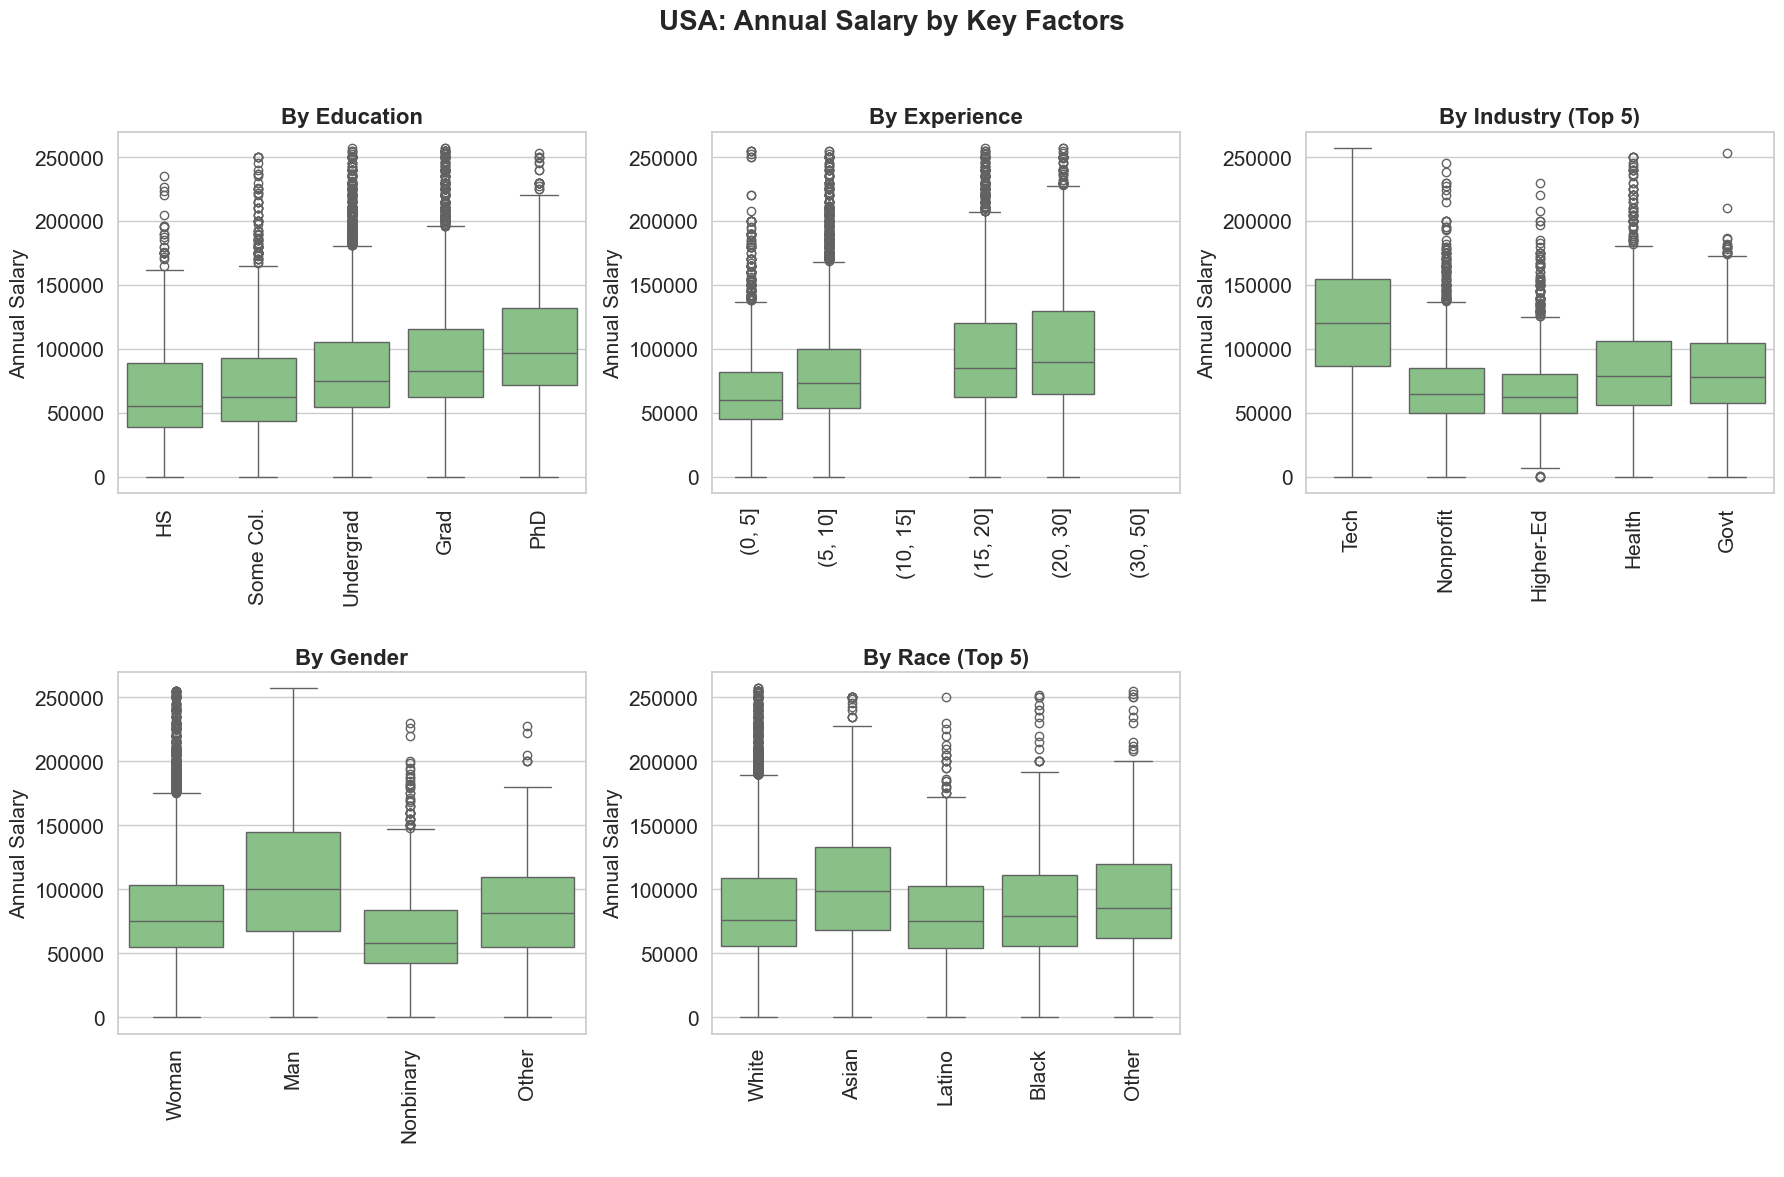

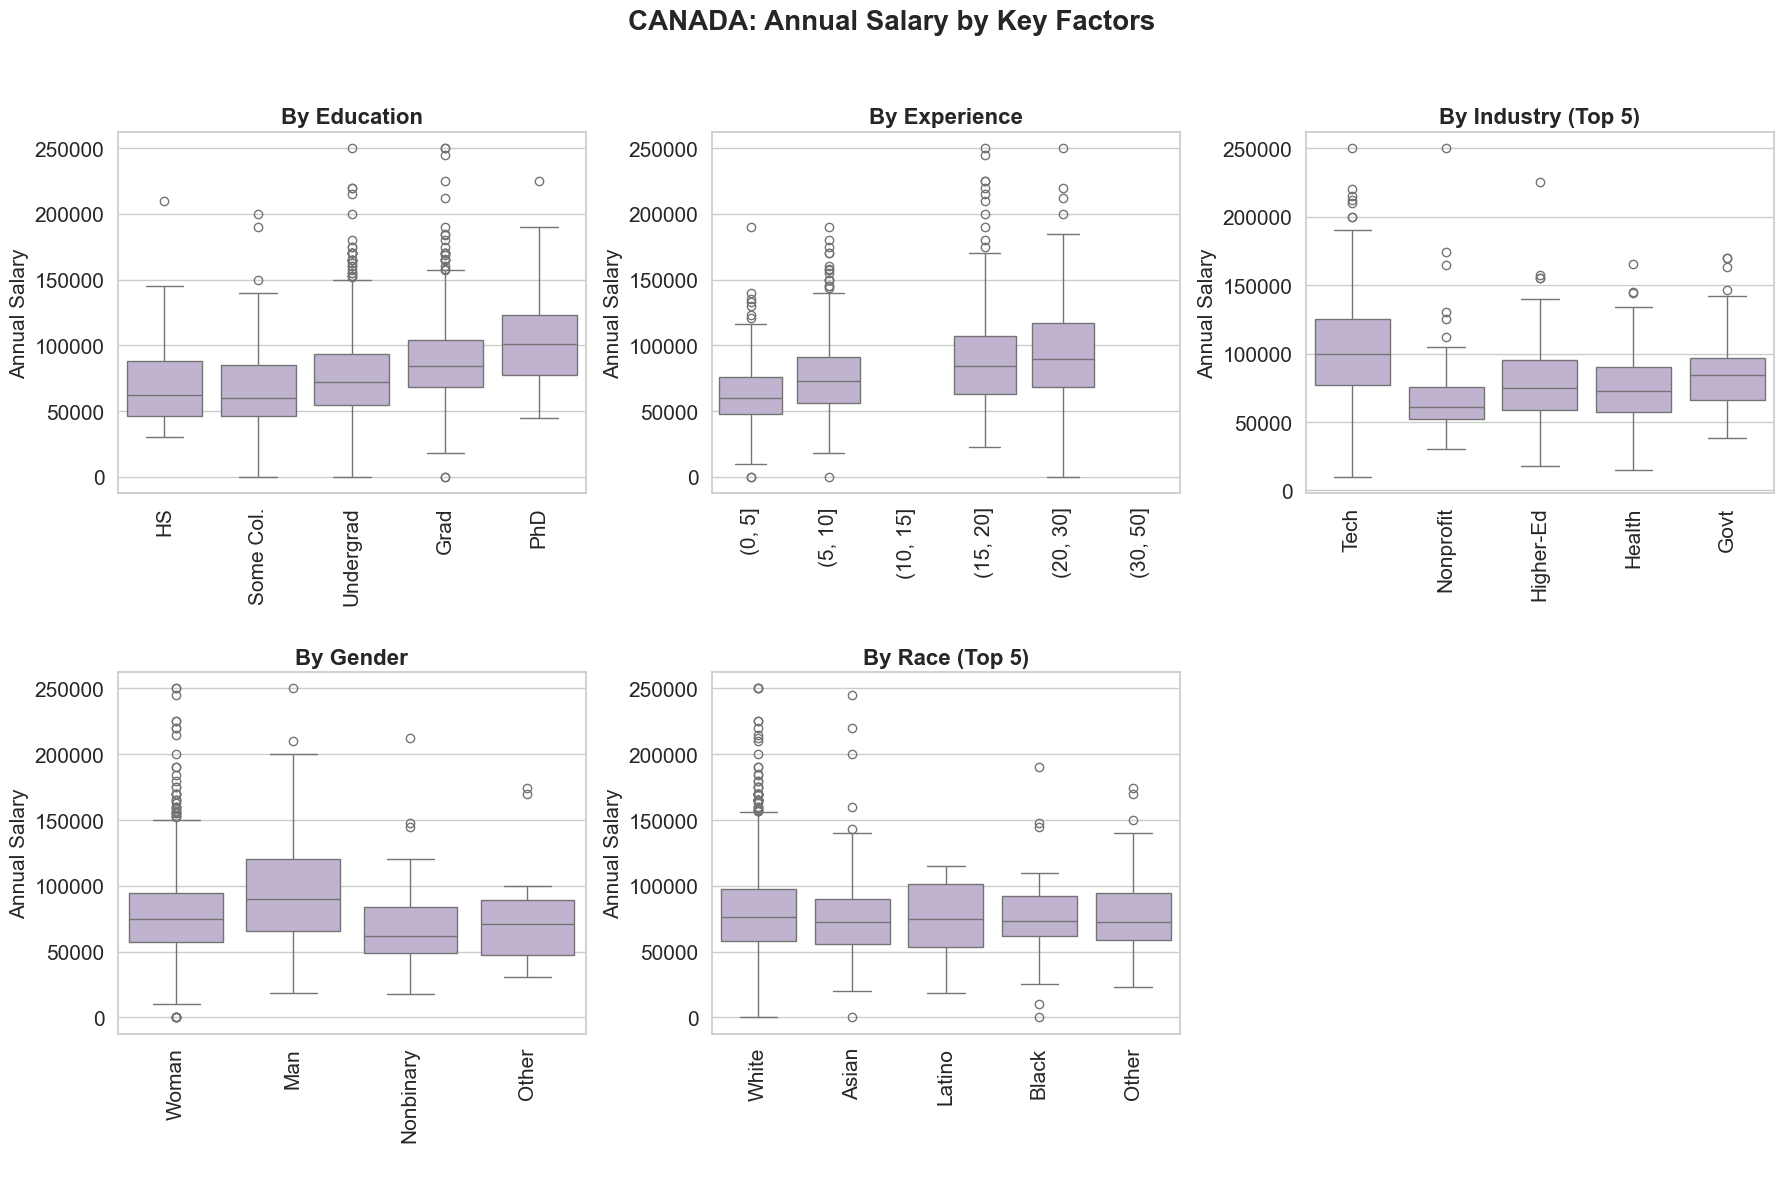

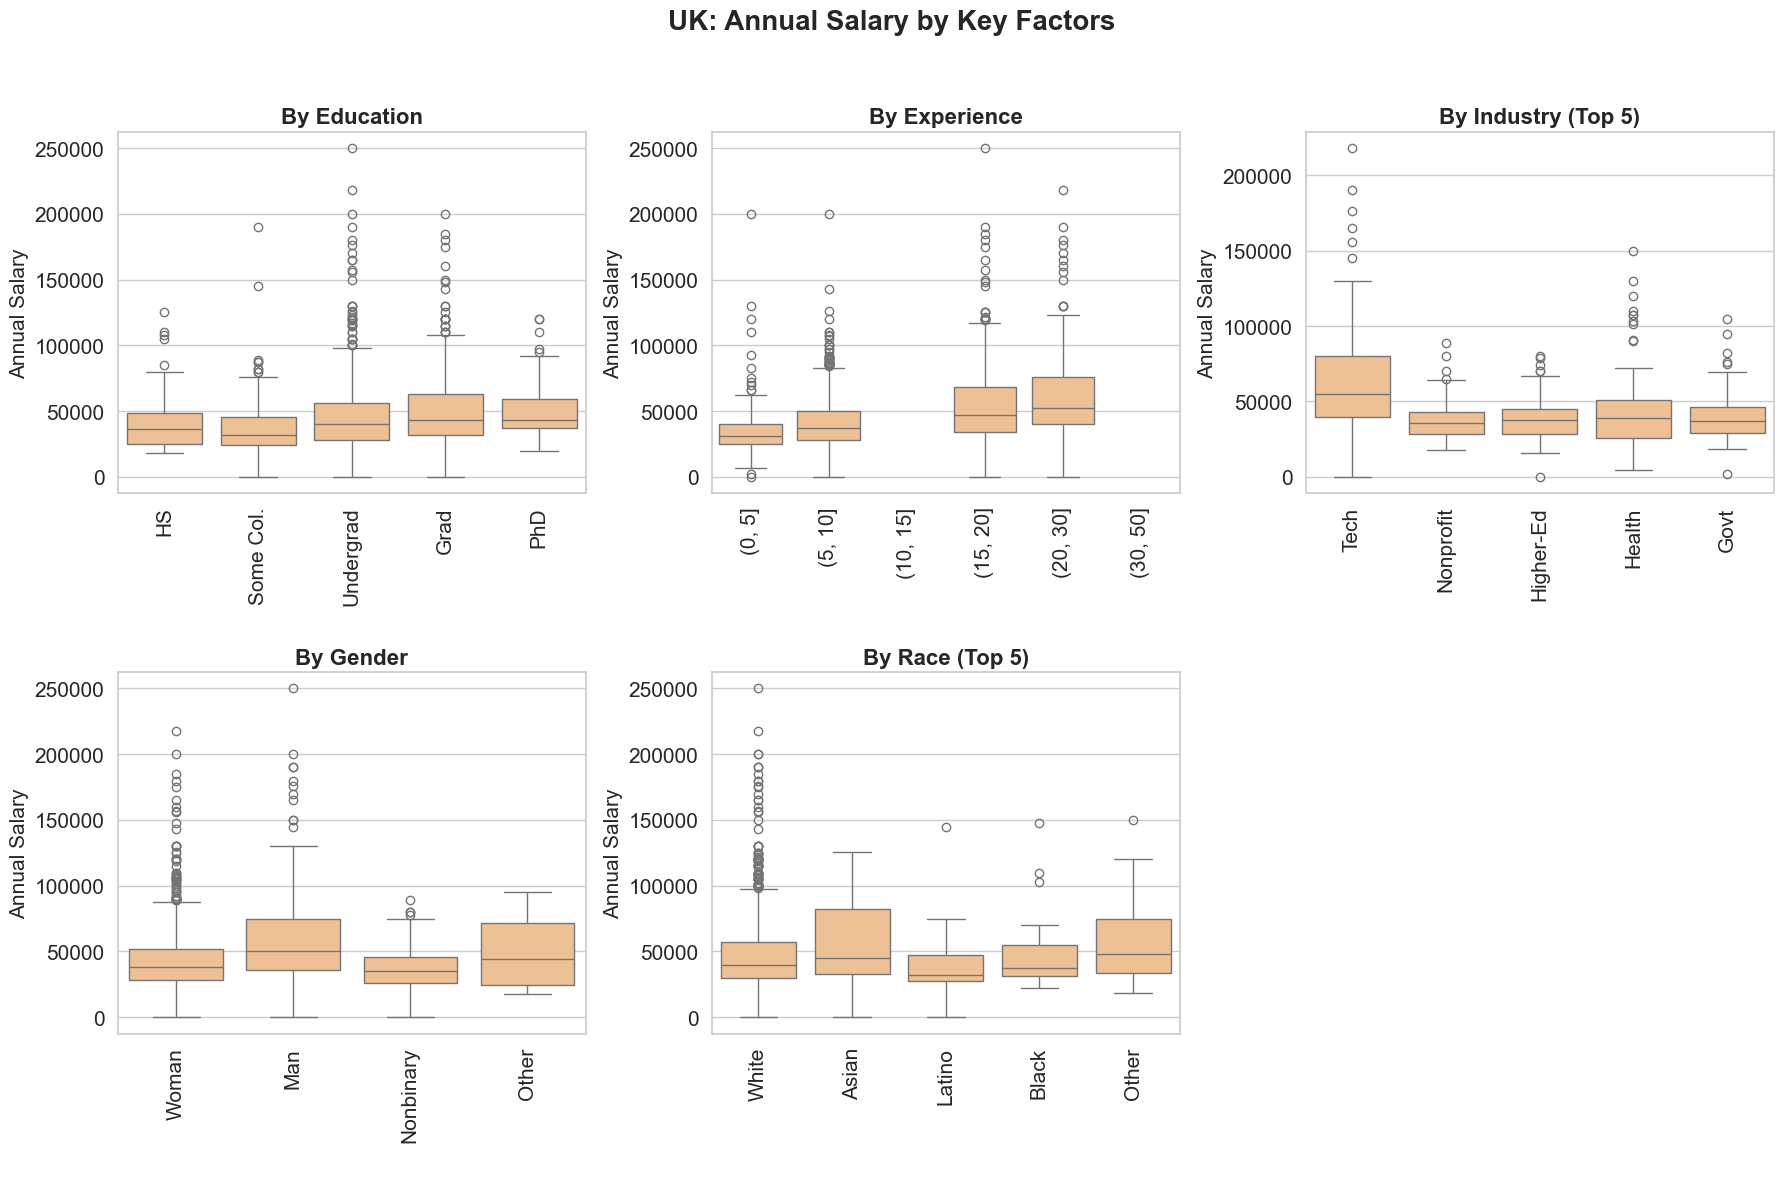

In [ ]:
#creating mappings for each feature to create a compact graph
edu_map = {
    "Master's degree": "Grad",
    "Professional degree (MD, JD, etc.)": "Grad",
    "Bachelor's degree": "Undergrad",
    "BA/BS": "Undergraduate",
    "College degree": "Undergrad",
    "Some college": "Some Col.",
    "High School": "HS",
    "PhD": "PhD"
}

exp_map = {
    '0-1': 0.5, '2-4': 3, '5-7': 6, '8-10': 9,
    '11-20': 15.5, '21-30': 25.5, '30+': 35
}

gender_map = {
    "Woman": "Woman", "Man": "Man", "Non-binary": "Nonbinary",
    "Other or prefer not to answer": "Other",
    "Prefer not to answer": "Other"
}

race_keywords = {
    "white": "White",
    "asian or asian american": "Asian",
    "another option not listed here or prefer not to answer": "Other",
    "hispanic": "Latino",
    "latino": "Latino",
    "spanish origin": "Latino",
    "black or african american": "Black"
}
industry_map = {
    "Computing or Tech": "Tech",
    "Nonprofits": "Nonprofit",
    "Education (Higher Education)": "Higher-Ed",
    "Health care": "Health",
    "Government and Public Administration": "Govt"
}

#helper function to apply mappings for race, since this mappping is more complicated 
def map_race_label(race):
    if pd.isnull(race):
        return "Other/NA"
    race = race.lower()
    for keyword, label in race_keywords.items():
        if keyword in race:
            return label
    return "Other/NA"

#apply mapping
df['eduLevelShort'] = df['eduLevel'].map(edu_map).fillna(df['eduLevel'])
df['overallExpYears'] = df['overallProExp'].map(exp_map)
df['industryShort'] = df['industry'].map(industry_map).fillna(df['industry'])
df['genderShort'] = df['gender'].map(gender_map).fillna(df['gender'])
df['raceShort'] = df['race'].apply(map_race_label)
df['raceLabel'] = df['raceShort']  


#choose 99th percentile of salary to prevent outliers from skewing data 
salary_cap = df['annualSalary'].quantile(0.99)
df_clip = df[df['annualSalary'] < salary_cap].copy()

#select top 5 industries
top_industries = df_clip['industryShort'].value_counts().head(5).index

#select top 5 races
top_races = df_clip['raceShort'].value_counts().head(5).index


#creating standard font styles, colors for graphs   
TITLE_FONT = 16
LABEL_FONT = 15
TICK_FONT = 15
colors = plt.cm.Accent.colors
color_map = {'USA': colors[0], 'CANADA': colors[1], 'UK': colors[2]}

# orders for consistent graphing
edu_order = ["HS", "Some Col.", "Undergrad", "Grad", "PhD"]
gender_order = ["Woman", "Man", "Nonbinary", "Other"]
race_order = ["White", "Asian", "Latino", "Black", "Other"]
industry_order = ["Tech", "Nonprofit", "Higher-Ed", "Health", "Govt"]


#creating a plot for each country using for loops
for country in ['USA', 'CANADA', 'UK']:
    
    df_country = df_clip[df_clip['workCountry'] == country].copy()
    #binning 
    df_country['exp_bin'] = pd.cut(df_country['overallExpYears'], bins=[0, 5, 10, 15, 20, 30, 50])

    df_industry = df_country[df_country['industryShort'].isin(top_industries)]
    df_race = df_country[df_country['raceShort'].isin(top_races)]

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f"{country}: Annual Salary by Key Factors", fontsize=20, fontweight='bold')

    plots = [
        ("eduLevelShort", df_country, "By Education", " "),
        ("exp_bin", df_country, "By Experience", " "),
        ("industryShort", df_industry, "By Industry (Top 5)", " "),
        ("genderShort", df_country, "By Gender", " "),
        ("raceLabel", df_race, "By Race (Top 5)", " ")
    ]

    #  plotting loop:
    for ax, (x_var, data, title, xlabel) in zip(axes.flat, plots):
        if x_var == "eduLevelShort":
            order = edu_order
        elif x_var == "genderShort":
            order = gender_order
        elif x_var == "raceLabel":
            order = race_order
        elif x_var == "industryShort":
            order = industry_order
        else:
            order = None  #for experience binning

        sns.boxplot(data=data, x=x_var, y='annualSalary', color=color_map[country], ax=ax, order=order)

        ax.set_title(title, fontsize=TITLE_FONT, fontweight='bold')

        ax.set_xlabel(xlabel, fontsize=LABEL_FONT)  
        ax.set_ylabel("Annual Salary", fontsize=LABEL_FONT)
        ax.tick_params(axis='x', labelsize=TICK_FONT, rotation=90)
        ax.tick_params(axis='y', labelsize=TICK_FONT)


    axes[1, 2].axis('off')  # Hide unused 6th subplot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [14]:
#finding unique values in each col
print("EDUCATION LEVELS:")
print(df_clip['eduLevel'].unique())

print("\nINDUSTRIES:")
print(df_clip['industry'].unique())

print("\nGENDERS:")
print(df_clip['gender'].unique())

print("\nRACES:")
print(df_clip['race'].unique())



EDUCATION LEVELS:
["Master's degree" 'College degree' 'PhD' 'Some college' 'High School'
 'Professional degree (MD, JD, etc.)']

INDUSTRIES:
['Education (Higher Education)' 'Computing or Tech'
 'Accounting, Banking & Finance' ... 'Student ' 'Wine & Spirits' 'ABA']

GENDERS:
['Woman' 'Non-binary' 'Man' 'Other']

RACES:
['White' 'Hispanic, Latino, or Spanish origin, White'
 'Asian or Asian American, White' 'Asian or Asian American'
 'Another option not listed here or prefer not to answer'
 'Hispanic, Latino, or Spanish origin'
 'Middle Eastern or Northern African'
 'Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, White'
 'Black or African American' 'Black or African American, White'
 'Black or African American, Hispanic, Latino, or Spanish origin, White'
 'Native American or Alaska Native'
 'Native American or Alaska Native, White'
 'Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer'
 'Black or African American, Middle Ea

## Comparing which feature impacts salary the most across countries using Z-scores

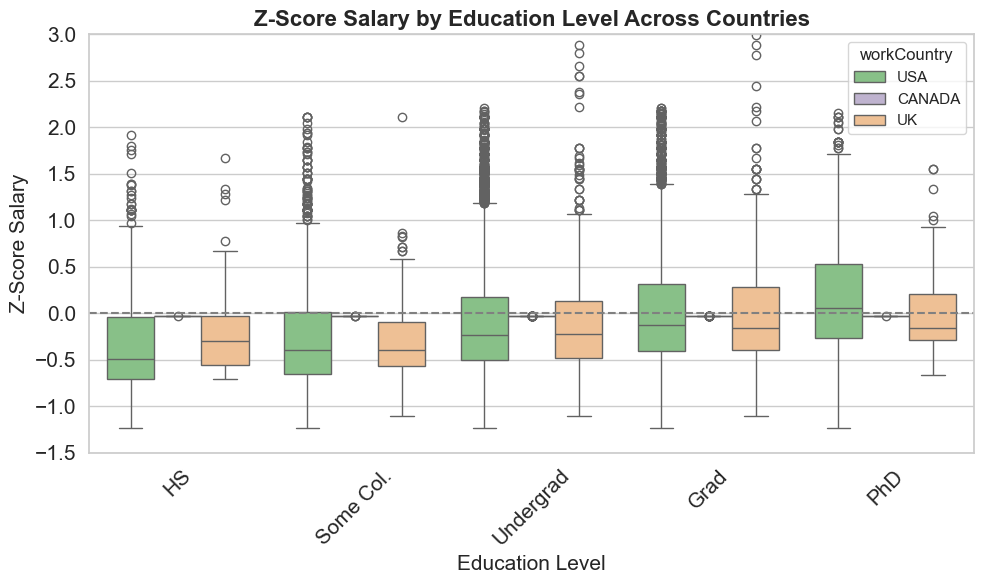

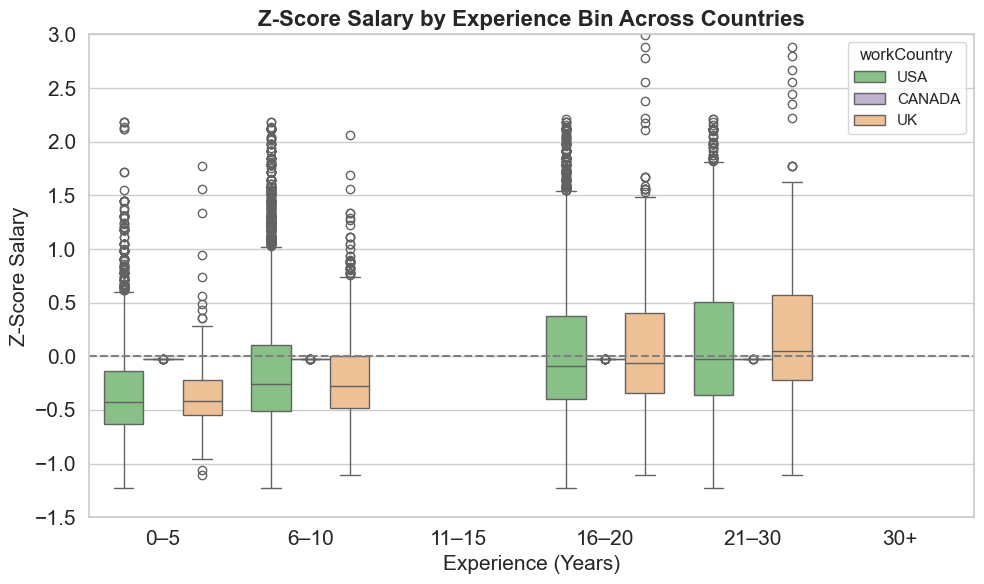

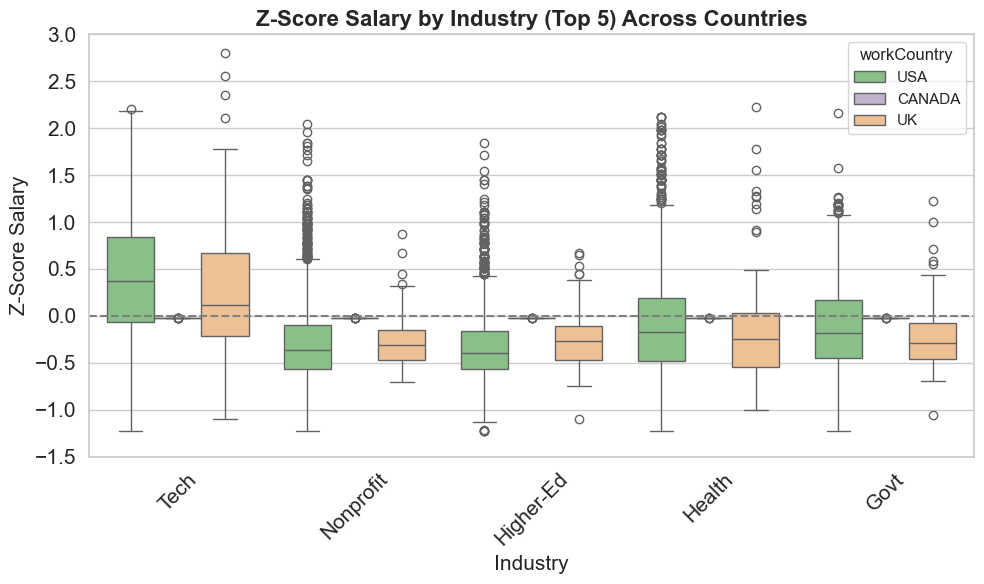

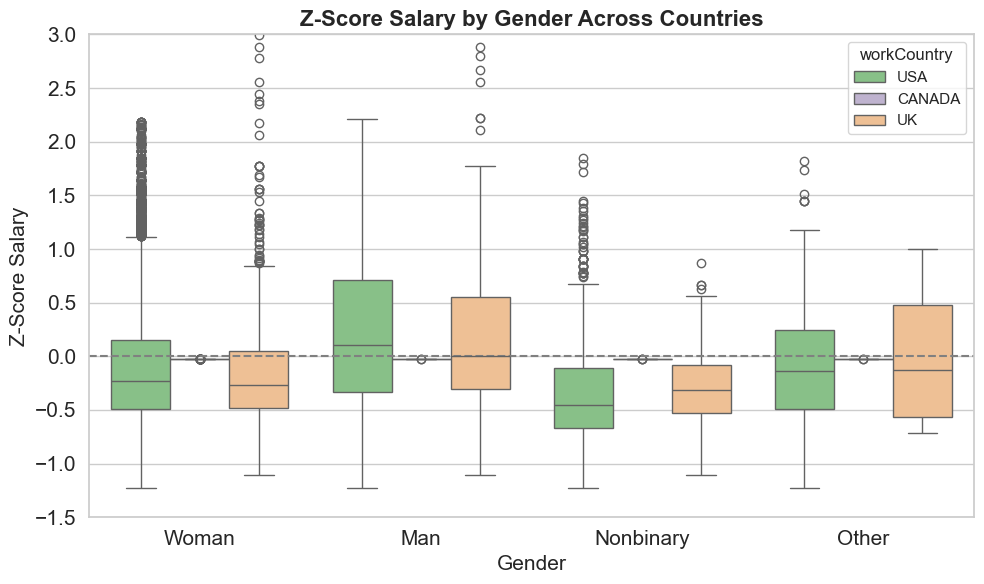

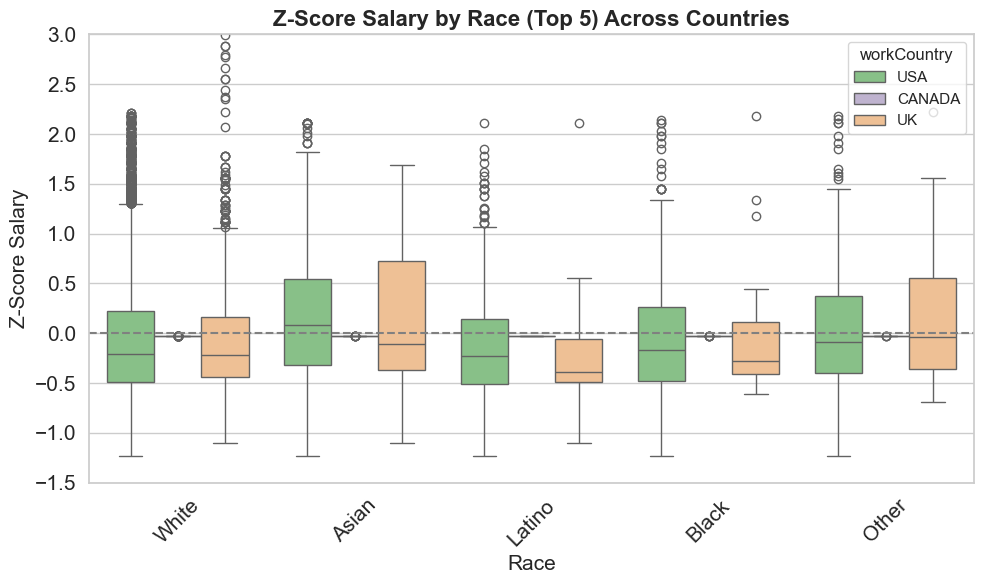

In [15]:
# set up color palette for consistent coloring
colors = plt.cm.Accent.colors
palette = {'USA': colors[0], 'CANADA': colors[1], 'UK': colors[2]}


# convert experience values into numeric and bin
df_clip['overallExpYears'] = df_clip['overallProExp'].map(exp_map)
df_clip['exp_bin'] = pd.cut(
    df_clip['overallExpYears'],
    bins=[0, 5, 10, 15, 20, 30, 50],
    labels=['0–5', '6–10', '11–15', '16–20', '21–30', '30+']
)


order = ['USA', 'CANADA', 'UK']  # used in hue_order

# plot z-score salary vs education
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clip, x='eduLevelShort', y='z_salary_country',
            hue='workCountry', hue_order=order, palette=palette, order=edu_order)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Z-Score Salary by Education Level Across Countries", fontsize=TITLE_FONT, fontweight='bold')
plt.xlabel("Education Level", fontsize=LABEL_FONT)
plt.ylabel("Z-Score Salary", fontsize=LABEL_FONT)
plt.xticks(rotation=45, fontsize=TICK_FONT)
plt.yticks(fontsize=TICK_FONT)
plt.ylim(-1.5, 3)
plt.tight_layout()
plt.show()

# plot z-score salary vs experience
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clip, x='exp_bin', y='z_salary_country',
            hue='workCountry', hue_order=order, palette=palette)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Z-Score Salary by Experience Bin Across Countries", fontsize=TITLE_FONT, fontweight='bold')
plt.xlabel("Experience (Years)", fontsize=LABEL_FONT)
plt.ylabel("Z-Score Salary", fontsize=LABEL_FONT)
plt.xticks(fontsize=TICK_FONT)
plt.yticks(fontsize=TICK_FONT)
plt.ylim(-1.5, 3)
plt.tight_layout()
plt.show()

# plot z-score salary vs industry
df_ind = df_clip[df_clip['industryShort'].isin(top_industries)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ind, x='industryShort', y='z_salary_country',
            hue='workCountry', hue_order=order, palette=palette,
            order=industry_order)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Z-Score Salary by Industry (Top 5) Across Countries", fontsize=TITLE_FONT, fontweight='bold')
plt.xlabel("Industry", fontsize=LABEL_FONT)
plt.ylabel("Z-Score Salary", fontsize=LABEL_FONT)
plt.xticks(rotation=45, fontsize=TICK_FONT)
plt.yticks(fontsize=TICK_FONT)
plt.ylim(-1.5, 3)
plt.tight_layout()
plt.show()

# plot z-score salary vs gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clip, x='genderShort', y='z_salary_country',
            hue='workCountry', hue_order=order, palette=palette, order=gender_order)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Z-Score Salary by Gender Across Countries", fontsize=TITLE_FONT, fontweight='bold')
plt.xlabel("Gender", fontsize=LABEL_FONT)
plt.ylabel("Z-Score Salary", fontsize=LABEL_FONT)
plt.xticks(fontsize=TICK_FONT)
plt.yticks(fontsize=TICK_FONT)
plt.ylim(-1.5, 3)
plt.tight_layout()
plt.show()

# plot z-score salary vs race
df_race = df_clip[df_clip['raceShort'].isin(top_races)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_race, x='raceShort', y='z_salary_country',
            hue='workCountry', hue_order=order, palette=palette, order=race_order)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Z-Score Salary by Race (Top 5) Across Countries", fontsize=TITLE_FONT, fontweight='bold')
plt.xlabel("Race", fontsize=LABEL_FONT)
plt.ylabel("Z-Score Salary", fontsize=LABEL_FONT)
plt.xticks(rotation=45, fontsize=TICK_FONT)
plt.yticks(fontsize=TICK_FONT)
plt.ylim(-1.5, 3)
plt.tight_layout()
plt.show()
